# **Import Modules**

## *python*

In [1]:
# Import python modules
import os,sys
import pandas as pd
from IPython.display import display

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join('..')))

##import relevant modules
try:
    from scripts._04_Modelling_Tracking import CreditRiskTrainer

except ImportError:
    print('Could not import module from `scripts/`.')

# **Modelling**

In [3]:
# Define DataFrame path
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data/processed/WoE_target_feature_data.csv')
mdl_dir = os.path.join(os.path.dirname(os.getcwd()), 'models')

In [4]:
# Initalise the trainer
trainer = CreditRiskTrainer (data_path = data_path, mdl_dir = mdl_dir)

# Compare models
trainer.compare_models()  


Starting model comparison...
Loading data from: ..\data\processed\WoE_target_feature_data.csv

Data split into training and testing sets.

Comparing models...



LogisticRegression ROC-AUC: 0.7950


DecisionTree ROC-AUC: 0.9472


RandomForest ROC-AUC: 0.9996


GBM ROC-AUC: 0.9877

Best Model: RandomForest with ROC-AUC = 0.9996


In [5]:
# Train the best model with tracking
trainer.train_with_tracking()  # GBM with GridSearchCV + MLflow logging
trainer.save_model()  # Save locally


Starting model training with MLflow tracking...
Loading data from: ..\data\processed\WoE_target_feature_data.csv

Data split into training and testing sets.
Tuning model: RandomForest

Best Parameters Found: {'max_depth': 6, 'n_estimators': 150}

Evaluation Metrics:
accuracy  : 0.9308
precision : 0.8365
recall    : 0.4964
f1        : 0.6230
roc_auc   : 0.9655



Training completed for RandomForest and logged to MLflow.

Model saved to: ..\models\randomforestclassifier_credit_model_boosted.pkl


Loading data from: ..\data\processed\WoE_target_feature_data.csv

Data split into training and testing sets.


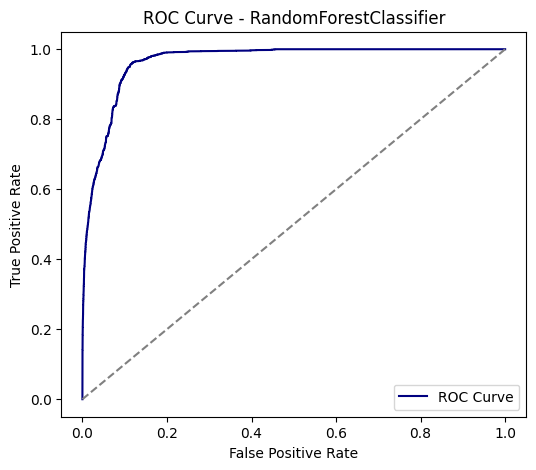

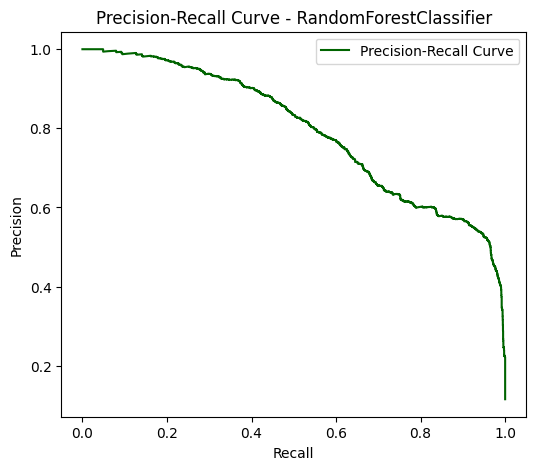

In [6]:
# Plot the curves
trainer.plot_curves()

In [7]:
# Save and load the model
trainer.save_model()
trainer.load_model()
#trainer.model.predict(X_new)  # Example prediction with the loaded model


Model saved to: ..\models\randomforestclassifier_credit_model_boosted.pkl

Model loaded from: ..\models\randomforestclassifier_credit_model_boosted.pkl
